The images contain the same object.


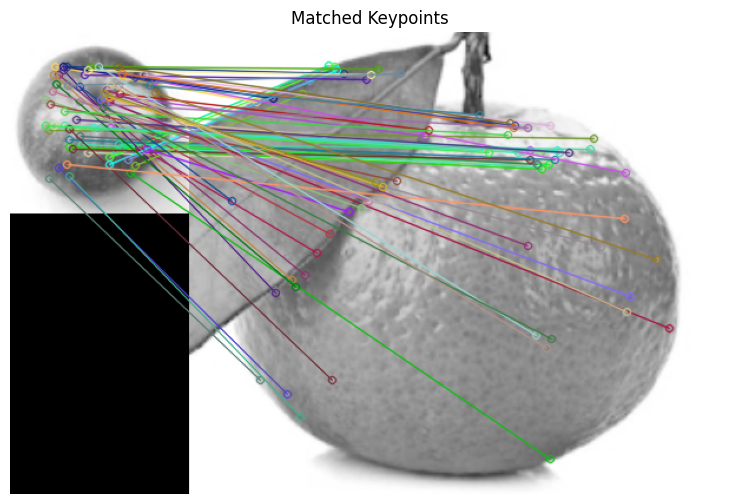

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def match_images(image1, image2):
    # Initialize BRIEF detector
    fast = cv2.FastFeatureDetector_create()  # * Adjust detector
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Detect keypoints and compute descriptors for both images
    keypoints1 = fast.detect(image1, None)  # * Adjust detector
    keypoints1, descriptors1 = brief.compute(image1, keypoints1)
    keypoints2 = fast.detect(image2, None)  # * Adjust detector
    keypoints2, descriptors2 = brief.compute(image2, keypoints2)

    # Create a Brute Force Matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Initialize matches
    matches = []

    # Match descriptors
    if descriptors1 is not None and descriptors2 is not None:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key=lambda x: x.distance)

    # Compute similarity score based on the number of matches
    similarity_score = len(matches)

    return similarity_score, keypoints1, keypoints2, matches

def main():
    # Load the images
    image1 = cv2.imread('test_matching/test_apple1.png', cv2.IMREAD_GRAYSCALE)  # * Adjust image path
    image2 = cv2.imread('test_matching/test_orange2.png', cv2.IMREAD_GRAYSCALE)  # * Adjust image path

    # Match the images
    similarity_score, keypoints1, keypoints2, matches = match_images(image1, image2)

    # Define a threshold for similarity score
    threshold = 30  # * Adjust threshold for similarity score (lower for more sensitivity)

    # Determine if the images contain the same object
    if similarity_score >= threshold:
        print("The images contain the same object.")
    else:
        print("The images contain different objects.")

    # Plot both images with matched keypoints
    matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(matched_image)
    plt.title('Matched Keypoints')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


- Distance: Program ini bisa mendeteksi objek yang sama meskipun berada dalam jarak yang cukup jauh.
- Angle: Jika objek difoto dari sudut yang bedanya terlalu ekstrim (mis: bagian dpn dan blkg), maka program ini tidak akan dapat mengenali objek tersebut.
- Brightness: Begitu pula jika brightnessnya diubah, jika hanya sedikit maka objek tersebut masih dapat dikenali, namun jika brightnessnya cukup kontras maka objek tidak akan dapat dikenali lagi.
- Crop: Jika kedua gambar yang sama dipotong, selama fitur uniknya masih ada maka program ini masih dapat matching objek tersebut. Namun jika bagian yang terpotong adalah fitur uniknya, maka gambar tidak akan dapat di matching kan lagi.
- Accuracy: Tidak terlalu bagus karena jika objeknya berbeda namun bentuknya mirip, maka program akan mengenalinya sebagai kedua objek yang sama. Namun jika bentuknya jauh berbeda, maka program akan mengenalinya sebagai objek yang berbeda.

Extractor -> Key Points -> Descriptor